In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Raw Data.csv")


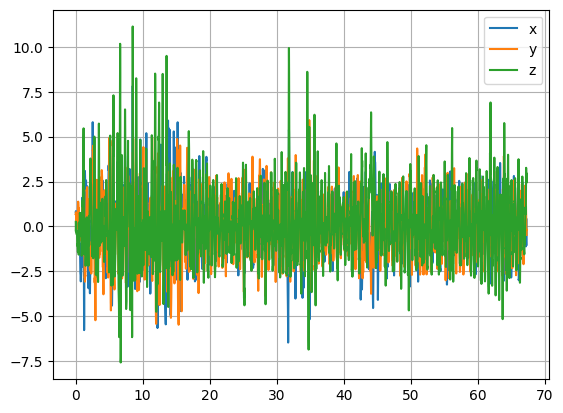

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.legend(['x','y','z'])
plt.grid()
plt.show()

In [5]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [6]:
T = df['Time (s)'][len(df['Time (s)'])-1] - df['Time (s)'][0]            #Koko Datan Pituus
n = len(df['Time (s)'])                                                  #Datapisteiden Lukumäärä
fs = n/T                                                                 #Näytteenotto taajuus (olettaen vakioksi)
nyq = fs/2                                                               #nyqvistin taajuus
order = 3                                                                #kertaluku
cutoff = 1/(0.2)

In [7]:
df['filter_a_x'] = butter_lowpass_filter(df['Linear Acceleration x (m/s^2)'], cutoff, fs, nyq, order)
df['filter_a_y'] = butter_lowpass_filter(df['Linear Acceleration y (m/s^2)'], cutoff, fs, nyq, order)
df['filter_a_z'] = butter_lowpass_filter(df['Linear Acceleration z (m/s^2)'], cutoff, fs, nyq, order)

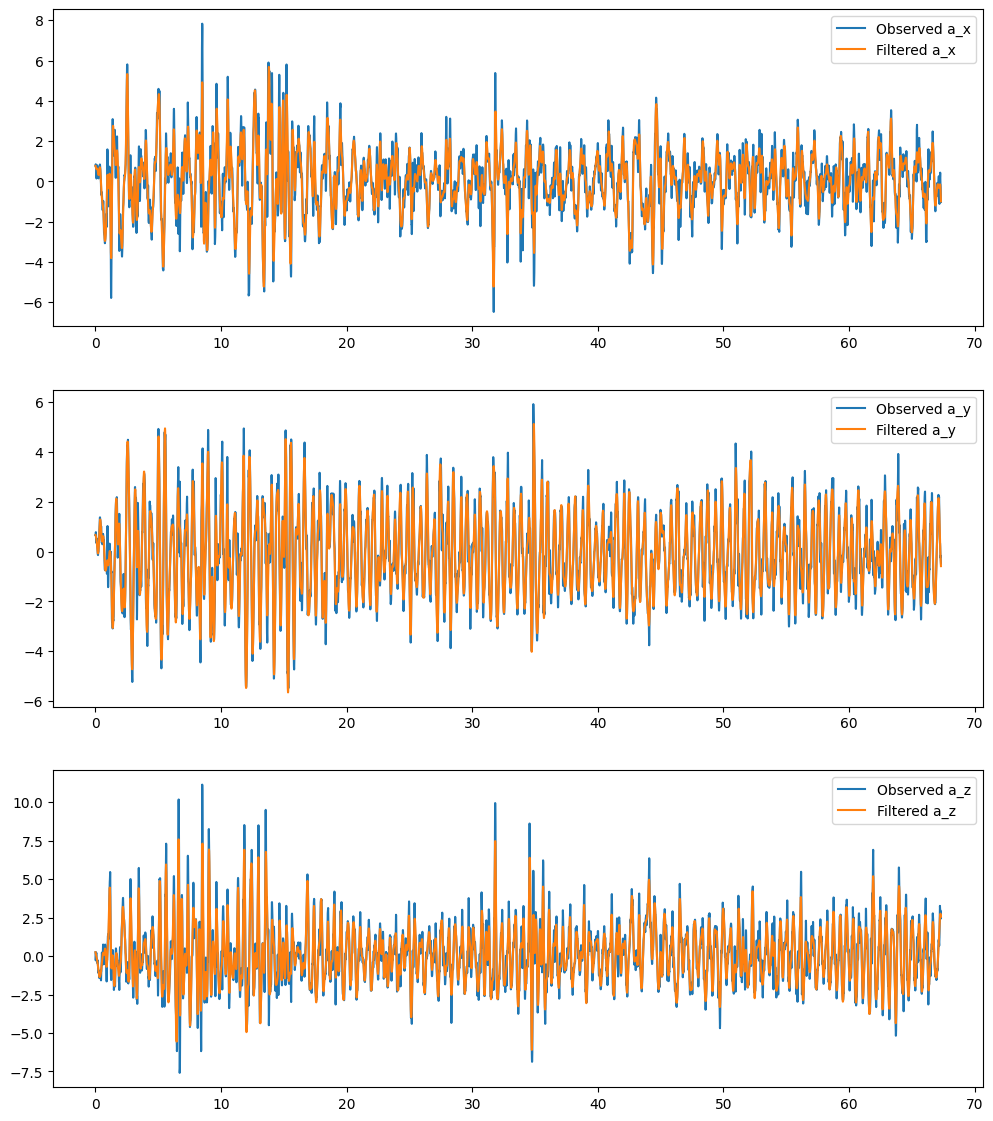

In [8]:
plt.figure(figsize=(12,14))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['filter_a_x'])
plt.legend(['Observed a_x' , 'Filtered a_x'])

plt.subplot(3,1,2)
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['filter_a_y'])
plt.legend(['Observed a_y' , 'Filtered a_y'])

plt.subplot(3,1,3)
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.plot(df['Time (s)'],df['filter_a_z'])
plt.legend(['Observed a_z' , 'Filtered a_z'])